### Analyse data daily-sea-ice-extent National Snow & Ice Data Center with RNN LSTM one-time step univariate time series 

In [1]:
# setup absolute path to location of package Starts and config-file 
from inspect import getsourcefile
import os.path as path, sys
current_dir = path.dirname(path.abspath(getsourcefile(lambda:0)))
sys.path.insert(0, current_dir[:current_dir.rfind(path.sep)])

from Starts.startml import *
from Starts.startvis import *
from Starts.startmodtf import *
%matplotlib inline

local_kwargs {'data_path': './data/daily-sea-ice-extent-data/seaice.csv, ./data/nsidc_ice_extent.csv, ./data/north_ice_extent.csv, ./data/south_ice_extent.csv, ./data/glacier-inventory/database.csv', 'drop_obj_col': False, 'nan_drop_col': False, 'nan_drop_row': False, 'nan_zero': False, 'nan_mean': True, 'nan_mean_neighbors': False}


Using TensorFlow backend.


In [2]:
ice = idata[1]
north = idata[2]
south = idata[3]

In [3]:
north.head()

,Time,Extent
0,1978-10-26,10.231
1,1978-10-28,10.420
2,1978-10-30,10.557
3,1978-11-01,10.670
4,1978-11-03,10.777


In [4]:
south.head()

,Time,Extent
0,1978-10-26,17.624
1,1978-10-28,17.803
2,1978-10-30,17.670
3,1978-11-01,17.527
4,1978-11-03,17.486


In [5]:
north.set_index('Time', inplace=True)
north.head()

,Extent
Time,
1978-10-26,10.231
1978-10-28,10.420
1978-10-30,10.557
1978-11-01,10.670
1978-11-03,10.777


In [6]:
# StartML.convert_time_series(south, time_column='Time').head()
south.set_index('Time', inplace=True)
south.head()

,Extent
Time,
1978-10-26,17.624
1978-10-28,17.803
1978-10-30,17.670
1978-11-01,17.527
1978-11-03,17.486


In [7]:
stf = StartModTFRNN(n_classes=None, dependent_label='Extent')
stf.info_parameters()


Input_units: 1 

Hidden_units: [10, 10] 

Output_units: 1 

Optimizer: Adagrad 

Activation_function: relu 

Learning_Rate: 0.001 

Training_Steps: 1000 

Batch_Size: 10 

Number_of_epochs: 1 

Feature_Scaling: False 

Loss_function: mean_squared_error 

Drop_out: 0.2 

Recurrent_drop_out: 0.2 

Bias_Initializer: random_uniform 

Depth_wise_Initializer: random_uniform 

Seed: 10 

Kernel_size: 1 

Filter_size: [3, 3] 

n_filters: 1 

n_padding: 1 

n_strides: 1 

momentum: 0.2 



In [12]:
# Update parameters 
new_param={'input_units': 1000, 'hidden_units': [1,1], 'output_units': 1, 'optimizer':'Adam',
           'activation_fn': 'sigmoid', 'learning_rate': 0.001,
           'steps': 5000, 'batch_size': 1, 'num_epochs': 5, 'feature_scl': True,
           'loss_fn': 'mean_squared_error', 'drop_out': 0.5, 'rec_drop_out': 0.6,
           'bias_initializer': 'random_uniform', 'depth_wise_initializer': 'random_uniform', 'seed': 10,
           'kernel_size': 1, 'filter_size': 1, 'momentum': 0.2, 'n_filters': 32, 'n_padding': 1, 'n_strides': 1}
stf.update_parameters=new_param
stf.info_parameters()


Input_units: 1000 

Hidden_units: [1, 1] 

Output_units: 1 

Optimizer: Adam 

Activation_function: sigmoid 

Learning_Rate: 0.001 

Training_Steps: 5000 

Batch_Size: 1 

Number_of_epochs: 5 

Feature_Scaling: True 

Loss_function: mean_squared_error 

Drop_out: 0.5 

Recurrent_drop_out: 0.6 

Bias_Initializer: random_uniform 

Depth_wise_Initializer: random_uniform 

Seed: 10 

Kernel_size: 1 

Filter_size: 1 

n_filters: 32 

n_padding: 1 

n_strides: 1 

momentum: 0.2 



At time point=1, Predicted=13.191129, Expected=13.236000
At time point=2, Predicted=13.192548, Expected=13.398000
At time point=3, Predicted=13.316690, Expected=13.475000
At time point=4, Predicted=13.416486, Expected=13.520000
At time point=5, Predicted=13.460177, Expected=13.456000
At time point=6, Predicted=13.418672, Expected=13.514000
At time point=7, Predicted=13.492661, Expected=13.574000
At time point=8, Predicted=13.615141, Expected=13.631000
At time point=9, Predicted=13.695504, Expected=13.715000
At time point=10, Predicted=13.755773, Expected=13.727000
At time point=11, Predicted=13.704213, Expected=13.778000
At time point=12, Predicted=13.698567, Expected=13.848000
At time point=13, Predicted=13.913072, Expected=13.855000
At time point=14, Predicted=13.880517, Expected=13.987000
At time point=15, Predicted=13.994483, Expected=13.997000
At time point=16, Predicted=14.003572, Expected=14.029000
At time point=17, Predicted=13.984396, Expected=14.131000
At time point=18, Predi

At time point=187, Predicted=8.236642, Expected=8.180000
At time point=188, Predicted=8.172713, Expected=8.074000
At time point=189, Predicted=8.078440, Expected=7.999000
At time point=190, Predicted=7.987235, Expected=7.898000
At time point=191, Predicted=7.890233, Expected=7.864000
At time point=192, Predicted=7.824221, Expected=7.839000
At time point=193, Predicted=7.904994, Expected=7.778000
At time point=194, Predicted=7.760020, Expected=7.680000
At time point=195, Predicted=7.634520, Expected=7.631000
At time point=196, Predicted=7.694207, Expected=7.649000
At time point=197, Predicted=7.703456, Expected=7.530000
At time point=198, Predicted=7.555637, Expected=7.510000
At time point=199, Predicted=7.511293, Expected=7.392000
At time point=200, Predicted=7.325018, Expected=7.350000
At time point=201, Predicted=7.371164, Expected=7.312000
At time point=202, Predicted=7.276961, Expected=7.128000
At time point=203, Predicted=7.093318, Expected=7.055000
At time point=204, Predicted=7.

At time point=345, Predicted=12.509265, Expected=12.543000
At time point=346, Predicted=12.596882, Expected=12.645000
At time point=347, Predicted=12.609505, Expected=12.656000
At time point=348, Predicted=12.600370, Expected=12.695000
At time point=349, Predicted=12.687941, Expected=12.725000
At time point=350, Predicted=12.692645, Expected=12.871000
At time point=351, Predicted=12.860073, Expected=12.995000
At time point=352, Predicted=13.060245, Expected=12.993000
At time point=353, Predicted=12.988596, Expected=12.967000
At time point=354, Predicted=12.966674, Expected=12.930000
At time point=355, Predicted=12.939521, Expected=12.936000
At time point=356, Predicted=12.927200, Expected=13.038000
At time point=357, Predicted=13.094217, Expected=13.046000
At time point=358, Predicted=13.098673, Expected=13.073000
At time point=359, Predicted=13.131691, Expected=13.125000
At time point=360, Predicted=13.102910, Expected=13.112000
At time point=361, Predicted=13.086879, Expected=13.0510

At time point=511, Predicted=11.502793, Expected=11.522000
At time point=512, Predicted=11.461901, Expected=11.396000
At time point=513, Predicted=11.460504, Expected=11.362000
At time point=514, Predicted=11.416390, Expected=11.323000
At time point=515, Predicted=11.310330, Expected=11.303000
At time point=516, Predicted=11.368278, Expected=11.313000
At time point=517, Predicted=11.306488, Expected=11.249000
At time point=518, Predicted=11.273258, Expected=11.158000
At time point=519, Predicted=11.113520, Expected=11.222000
At time point=520, Predicted=11.213569, Expected=11.148000
At time point=521, Predicted=11.212504, Expected=11.087000
At time point=522, Predicted=11.080420, Expected=10.997000
At time point=523, Predicted=11.061504, Expected=10.963000
At time point=524, Predicted=10.981342, Expected=10.815000
At time point=525, Predicted=10.794970, Expected=10.748000
At time point=526, Predicted=10.780033, Expected=10.767000
At time point=527, Predicted=10.775235, Expected=10.7380

At time point=691, Predicted=10.806379, Expected=10.829000
At time point=692, Predicted=10.889249, Expected=11.064000
At time point=693, Predicted=11.030527, Expected=11.135000
At time point=694, Predicted=11.199504, Expected=11.223000
At time point=695, Predicted=11.210828, Expected=11.296000
At time point=696, Predicted=11.250631, Expected=11.301000
At time point=697, Predicted=11.304554, Expected=11.372000
At time point=698, Predicted=11.304368, Expected=11.447000
At time point=699, Predicted=11.508067, Expected=11.542000
At time point=700, Predicted=11.521838, Expected=11.591000
At time point=701, Predicted=11.532226, Expected=11.739000
At time point=702, Predicted=11.667301, Expected=11.814000
At time point=703, Predicted=11.804251, Expected=11.871000
At time point=704, Predicted=11.843481, Expected=11.987000
At time point=705, Predicted=12.026460, Expected=12.019000
At time point=706, Predicted=12.005718, Expected=12.112000
At time point=707, Predicted=12.108664, Expected=12.1160

At time point=854, Predicted=12.267000, Expected=12.143000
At time point=855, Predicted=12.150636, Expected=12.041000
At time point=856, Predicted=12.009776, Expected=12.013000
At time point=857, Predicted=11.989043, Expected=11.945000
At time point=858, Predicted=11.887184, Expected=11.919000
At time point=859, Predicted=11.985007, Expected=11.910000
At time point=860, Predicted=11.906301, Expected=11.779000
At time point=861, Predicted=11.841976, Expected=11.718000
At time point=862, Predicted=11.714389, Expected=11.609000
At time point=863, Predicted=11.552684, Expected=11.596000
At time point=864, Predicted=11.552979, Expected=11.625000
At time point=865, Predicted=11.580887, Expected=11.591000
At time point=866, Predicted=11.547282, Expected=11.488000
At time point=867, Predicted=11.424819, Expected=11.401000
At time point=868, Predicted=11.416281, Expected=11.379000
At time point=869, Predicted=11.417213, Expected=11.361000
At time point=870, Predicted=11.338595, Expected=11.2850

At time point=1026, Predicted=7.113532, Expected=7.048000
At time point=1027, Predicted=7.022419, Expected=7.080000
At time point=1028, Predicted=6.997997, Expected=7.172000
At time point=1029, Predicted=7.148537, Expected=7.342000
At time point=1030, Predicted=7.315766, Expected=7.551000
At time point=1031, Predicted=7.495955, Expected=7.634000
At time point=1032, Predicted=7.611706, Expected=7.858000
At time point=1033, Predicted=7.830498, Expected=8.042000
At time point=1034, Predicted=8.094885, Expected=8.184000
At time point=1035, Predicted=8.200241, Expected=8.238000
At time point=1036, Predicted=8.206273, Expected=8.386000
At time point=1037, Predicted=8.314123, Expected=8.403000
At time point=1038, Predicted=8.354284, Expected=8.520000
At time point=1039, Predicted=8.480053, Expected=8.615000
At time point=1040, Predicted=8.677611, Expected=8.613000
At time point=1041, Predicted=8.644826, Expected=8.676000
At time point=1042, Predicted=8.684252, Expected=8.714000
At time point=

At time point=1184, Predicted=14.157747, Expected=14.040000
At time point=1185, Predicted=14.015238, Expected=14.094000
At time point=1186, Predicted=14.058371, Expected=13.993000
At time point=1187, Predicted=13.964144, Expected=13.875000
At time point=1188, Predicted=13.940867, Expected=13.899000
At time point=1189, Predicted=13.912216, Expected=13.935000
At time point=1190, Predicted=13.919583, Expected=13.911000
At time point=1191, Predicted=13.832942, Expected=13.785000
At time point=1192, Predicted=13.695477, Expected=13.717000
At time point=1193, Predicted=13.661074, Expected=13.740000
At time point=1194, Predicted=13.747675, Expected=13.704000
At time point=1195, Predicted=13.686423, Expected=13.738000
At time point=1196, Predicted=13.679307, Expected=13.667000
At time point=1197, Predicted=13.652270, Expected=13.624000
At time point=1198, Predicted=13.688485, Expected=13.591000
At time point=1199, Predicted=13.578289, Expected=13.562000
At time point=1200, Predicted=13.556794,

At time point=184, Predicted=8.490147, Expected=8.392000
At time point=185, Predicted=8.345255, Expected=8.378000
At time point=186, Predicted=8.385842, Expected=8.293000
At time point=187, Predicted=8.242293, Expected=8.180000
At time point=188, Predicted=8.192277, Expected=8.074000
At time point=189, Predicted=8.102344, Expected=7.999000
At time point=190, Predicted=8.013790, Expected=7.898000
At time point=191, Predicted=7.918487, Expected=7.864000
At time point=192, Predicted=7.832650, Expected=7.839000
At time point=193, Predicted=7.906546, Expected=7.778000
At time point=194, Predicted=7.732289, Expected=7.680000
At time point=195, Predicted=7.637805, Expected=7.631000
At time point=196, Predicted=7.682001, Expected=7.649000
At time point=197, Predicted=7.712993, Expected=7.530000
At time point=198, Predicted=7.574159, Expected=7.510000
At time point=199, Predicted=7.539821, Expected=7.392000
At time point=200, Predicted=7.335984, Expected=7.350000
At time point=201, Predicted=7.

At time point=335, Predicted=11.917769, Expected=11.959000
At time point=336, Predicted=11.923292, Expected=12.084000
At time point=337, Predicted=12.084522, Expected=12.227000
At time point=338, Predicted=12.173673, Expected=12.125000
At time point=339, Predicted=12.161138, Expected=12.230000
At time point=340, Predicted=12.181664, Expected=12.231000
At time point=341, Predicted=12.239017, Expected=12.267000
At time point=342, Predicted=12.239015, Expected=12.395000
At time point=343, Predicted=12.354646, Expected=12.437000
At time point=344, Predicted=12.440209, Expected=12.462000
At time point=345, Predicted=12.511558, Expected=12.543000
At time point=346, Predicted=12.607684, Expected=12.645000
At time point=347, Predicted=12.592561, Expected=12.656000
At time point=348, Predicted=12.605819, Expected=12.695000
At time point=349, Predicted=12.702765, Expected=12.725000
At time point=350, Predicted=12.707402, Expected=12.871000
At time point=351, Predicted=12.885281, Expected=12.9950

At time point=505, Predicted=11.830128, Expected=11.841000
At time point=506, Predicted=11.794002, Expected=11.792000
At time point=507, Predicted=11.738239, Expected=11.744000
At time point=508, Predicted=11.771846, Expected=11.721000
At time point=509, Predicted=11.683891, Expected=11.568000
At time point=510, Predicted=11.552448, Expected=11.543000
At time point=511, Predicted=11.514139, Expected=11.522000
At time point=512, Predicted=11.469961, Expected=11.396000
At time point=513, Predicted=11.470541, Expected=11.362000
At time point=514, Predicted=11.424278, Expected=11.323000
At time point=515, Predicted=11.321157, Expected=11.303000
At time point=516, Predicted=11.377790, Expected=11.313000
At time point=517, Predicted=11.308807, Expected=11.249000
At time point=518, Predicted=11.287141, Expected=11.158000
At time point=519, Predicted=11.108299, Expected=11.222000
At time point=520, Predicted=11.226431, Expected=11.148000
At time point=521, Predicted=11.246735, Expected=11.0870

At time point=676, Predicted=9.845016, Expected=9.853000
At time point=677, Predicted=9.806327, Expected=9.941000
At time point=678, Predicted=10.001173, Expected=9.951000
At time point=679, Predicted=9.895042, Expected=9.951000
At time point=680, Predicted=9.995753, Expected=10.002000
At time point=681, Predicted=10.001587, Expected=9.980000
At time point=682, Predicted=10.024429, Expected=9.946000
At time point=683, Predicted=9.997256, Expected=10.027000
At time point=684, Predicted=10.075234, Expected=10.153000
At time point=685, Predicted=10.190075, Expected=10.281000
At time point=686, Predicted=10.351937, Expected=10.382000
At time point=687, Predicted=10.391514, Expected=10.564000
At time point=688, Predicted=10.528415, Expected=10.754000
At time point=689, Predicted=10.799186, Expected=10.824000
At time point=690, Predicted=10.769051, Expected=10.846000
At time point=691, Predicted=10.812336, Expected=10.829000
At time point=692, Predicted=10.880695, Expected=11.064000
At time 

At time point=829, Predicted=13.881723, Expected=13.822000
At time point=830, Predicted=13.776112, Expected=13.815000
At time point=831, Predicted=13.794763, Expected=13.632000
At time point=832, Predicted=13.667068, Expected=13.542000
At time point=833, Predicted=13.574808, Expected=13.624000
At time point=834, Predicted=13.656531, Expected=13.548000
At time point=835, Predicted=13.593114, Expected=13.542000
At time point=836, Predicted=13.555230, Expected=13.492000
At time point=837, Predicted=13.472475, Expected=13.408000
At time point=838, Predicted=13.404455, Expected=13.342000
At time point=839, Predicted=13.339629, Expected=13.257000
At time point=840, Predicted=13.260856, Expected=13.183000
At time point=841, Predicted=13.181903, Expected=13.164000
At time point=842, Predicted=13.138993, Expected=13.119000
At time point=843, Predicted=13.081648, Expected=12.987000
At time point=844, Predicted=12.941824, Expected=12.745000
At time point=845, Predicted=12.766494, Expected=12.6760

At time point=997, Predicted=5.220725, Expected=5.281000
At time point=998, Predicted=5.309805, Expected=5.285000
At time point=999, Predicted=5.299015, Expected=5.269000
At time point=1000, Predicted=5.252689, Expected=5.269000
At time point=1001, Predicted=5.267202, Expected=5.327000
At time point=1002, Predicted=5.399583, Expected=5.387000
At time point=1003, Predicted=5.403269, Expected=5.363000
At time point=1004, Predicted=5.379597, Expected=5.405000
At time point=1005, Predicted=5.441603, Expected=5.386000
At time point=1006, Predicted=5.385830, Expected=5.425000
At time point=1007, Predicted=5.396215, Expected=5.446000
At time point=1008, Predicted=5.391397, Expected=5.515000
At time point=1009, Predicted=5.473860, Expected=5.554000
At time point=1010, Predicted=5.521858, Expected=5.598000
At time point=1011, Predicted=5.547556, Expected=5.736000
At time point=1012, Predicted=5.763308, Expected=5.857000
At time point=1013, Predicted=5.919342, Expected=5.880000
At time point=101

At time point=1185, Predicted=14.013370, Expected=14.094000
At time point=1186, Predicted=14.069205, Expected=13.993000
At time point=1187, Predicted=13.984023, Expected=13.875000
At time point=1188, Predicted=13.949384, Expected=13.899000
At time point=1189, Predicted=13.925081, Expected=13.935000
At time point=1190, Predicted=13.942933, Expected=13.911000
At time point=1191, Predicted=13.855641, Expected=13.785000
At time point=1192, Predicted=13.730739, Expected=13.717000
At time point=1193, Predicted=13.669549, Expected=13.740000
At time point=1194, Predicted=13.761821, Expected=13.704000
At time point=1195, Predicted=13.707794, Expected=13.738000
At time point=1196, Predicted=13.684912, Expected=13.667000
At time point=1197, Predicted=13.668211, Expected=13.624000
At time point=1198, Predicted=13.693719, Expected=13.591000
At time point=1199, Predicted=13.567252, Expected=13.562000
At time point=1200, Predicted=13.573372, Expected=13.492000
At time point=1201, Predicted=13.541209,

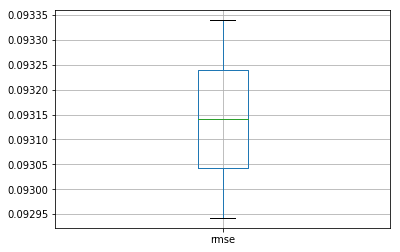

In [13]:
lstm_model, y_truth, y_pred = stf.keras_rnn_lstm_onestep_univ(data=north, repeats=2)

In [14]:
lstm_model

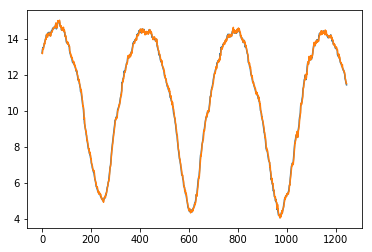

In [15]:
# line plot of observed vs predicted on test_data
plt.plot(y_truth)
plt.plot(y_pred)
plt.show()